In [2]:
%matplotlib inline

import matplotlib
import autograd.numpy as np
import matplotlib.pyplot as plt
import random
import math
from autograd import grad

def generateChevronData():
    xBounds = [-50, 50]
    yBounds = [-50, 50]
    totalPoints = 100
    
    points = []
    targets = []
    
    for i in range(0, totalPoints):
        x = random.randint(xBounds[0], xBounds[1])
        y = random.randint(yBounds[0], yBounds[1])
        
        if x >= y and x <= -y:
            points.append([1, x/50.0,y/50.0])
            targets.append(0)
        else:
            points.append([1, x/50.0,y/50.0])
            targets.append(1)
        
    return np.array(points), np.array(targets)

def plotLine(points):
    xs = [x[1] for x in points]
    ys = [y[2] for y in points]
    
    plt.plot(xs, ys, color='r',linestyle='-')

def plotScatter(points):
    xs = [x[1] for x in points]
    ys = [y[2] for y in points]
    
    plt.scatter(xs, ys)

In [3]:
def sigmoid(phi):
    return 1.0/(1.0 + np.exp(-phi))

def MSE(weights):
    localPoints = np.array(list(map(lambda x: (x[1] - weights[1])**2 + (x[2] - weights[2])**2 <= radius**2, points)))
    predictions = logisticPrediction(weights, points)
    
    s = 0
    for i in range(0, len(points)):
        if localPoints[i]:
            s += (targets[i] - predictions[i])**2
    
    return 1.0/2.0 * s
#     return 1.0/2.0 * np.sum(np.power((targets - predictions), 2))

# def localLogLoss(weights):
#     predictions = logisticPrediction(weights, points)
#     print(targets)
#     print(predictions)
#     probs = predictions * targets + (1 - predictions) * (1 - targets)
#     print(predictions)
#     print(targets)
#     print(np.log(probs))
#     return -(1/len(points)) * np.sum(np.log(probs))

# def localLogLoss(weights, example):
#     return (predict(weights, example))

def logisticPrediction(weights, p):
    ins = np.array(list(map(lambda x: predict(weights, x), p)))
    return ins
    
def predict(weights, i):
    return sigmoid((i[2] - weights[2]) - weights[0] * (i[1] - weights[1]))

In [4]:
def computeGradient(weights, example, target):
    prediction = predict(weights, example)
    E = -np.log(target * prediction + (1-target) * (1-prediction))
    dE_dO = computeErrorDifferential(prediction, target)
    
    dO_dZ = prediction * (1-prediction)
    
    dZ_dy = -1
    dZ_dm = weights[1] - example[1]
    dZ_dx = weights[0]
    
    dE_dZ = dE_dO * dO_dZ
    
    grad = np.zeros(3)#[0.0, 0.0, 0.0]
    grad[0] = dZ_dm * dE_dZ
    grad[1] = dZ_dx * dE_dZ
    grad[2] = dZ_dy * dE_dZ
    
    return grad, E

def computeErrorDifferential(prediction, target):
    return -(target - prediction)
#     print(prediction, target)
#     if target == 1:
#         return -1/np.log(prediction)
    
#     return 1/np.log(1-prediction)

In [5]:
def trainBoundaryHunter(weights):
    iPoints = []
#     weights = np.array([0.0, 0.5, -1.0])
#     trainingGradient = grad(MSE)
    
    print("Initial Loss: ", MSE(weights))
    for i in range(0, 10000):
#         g = trainingGradient(weights) * 0.01
        if i % 1000 == 0:
            print()
            iPoints.append(np.copy(weights))
            print("Loss Before: " + str(MSE(weights)))

        weights, error = computeStep(weights)
#         weights -= g
    
        if i % 1000 == 0:
            print("Loss After [i = " + str(i) + "]: " + str(MSE(weights)))
            print(weights)
            
    print("Trained Loss: ", MSE(weights))    
    print("Weights: ", weights)
    return weights, iPoints

def computeStep(weights):
    totalG = np.zeros(3)
    totalE = 0
    
    localPoints = np.array(list(map(lambda x: (x[1] - weights[1])**2 + (x[2] - weights[2])**2 <= radius**2, points)))

    
    for i in range(0, len(points)):
        if not localPoints[i]:
            continue
        
        g, error = computeGradient(weights, points[i], targets[i])
        totalE += error
        totalG += g     
        
    totalG = totalG * (1/len(points))
    totalE = totalE * (1/len(points))
        
    weights -= totalG * 0.01
    return weights, totalE

Type 0:  35
Type 1:  65


Boundary Hunter: 0

Initial Loss:  1.63204891482

Loss Before: 1.63204891482
Loss After [i = 0]: 1.63177092365
[-0.39671528 -0.20921633  0.43178954]

Loss Before: 1.47661871083
Loss After [i = 1000]: 1.47637251409
[-0.38363837 -0.26778192  0.28139062]

Loss Before: 1.92949262018
Loss After [i = 2000]: 1.92917428007
[-0.36813708 -0.32515023  0.12942068]

Loss Before: 1.9262833571
Loss After [i = 3000]: 1.92609961192
[-0.33676569 -0.37688884 -0.01733495]

Loss Before: 1.62486207501
Loss After [i = 4000]: 1.62475450205
[-0.30745253 -0.41262915 -0.12790452]

Loss Before: 1.62910912867
Loss After [i = 5000]: 1.62906299569
[-0.2773988  -0.4341265  -0.20129866]

Loss Before: 1.62270669344
Loss After [i = 6000]: 1.62269168936
[-0.24650195 -0.44421684 -0.23925384]

Loss Before: 1.69421514509
Loss After [i = 7000]: 1.69420127119
[-0.21159601 -0.44737463 -0.25282676]

Loss Before: 1.68046762413
Loss After [i = 8000]: 1.68045399952
[-0.1750584  -0.44857226 -0.25901199]

L

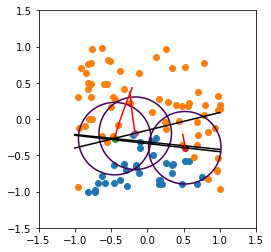

In [10]:
random.seed(1234)
points, targets = generateChevronData()

plt.axis([-1.5, 1.5, -1.5, 1.5])

# Plot points on graph
c1 = []
c2 = []

for i in range(0, len(points)):
    if targets[i] == 0:
        c1.append(points[i])
    else:
        c2.append(points[i])

print("Type 0: ", len(c1))
print("Type 1: ", len(c2))
        
plotScatter(c1)
plotScatter(c2)

radius = 0.5

boundaryHunters = []

for i in range(0, 3):
    print("\n\nBoundary Hunter: " + str(i) + "\n")
    weights = np.random.uniform(-0.5, 0.5, 3)
    weights, iPoints = trainBoundaryHunter(weights)
    boundaryHunters.append(weights)
    
    plotLine(iPoints)
    plt.scatter(weights[1], weights[2])
    plt.plot([-1.0, 1.0], [weights[2] + weights[0]*((-1) - weights[1]), weights[2] + weights[0]*(1 - weights[1])], 'k-')

    x = np.linspace(-1.5, 1.5, 500)
    y = np.linspace(-1.5, 1.5, 500)
    X, Y = np.meshgrid(x,y)
    F = ((X - weights[1]))**2 + ((Y - weights[2]))**2 - radius**2
    plt.contour(X,Y,F,[0])

plt.gca().set_aspect('equal')

plt.show()